# Filtragem Adaptativa - Lab 1

## Parte 1 - Sinais e Sistemas

In [3]:
#Imports do Notebook

from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import math

1. Gere dois sinais senoidais, $s_1(n)$ e $s_2(n)$, com frequências iguais a $1kHz$ e $4kHz$, respectivamente, considerando uma taxa de amostragem igual a $f_s = 16kHz$.

2. Gere um sinal $s_3(n)$ que corresponde a uma forma de onda quadrada (duty cycle de 50%), com frequência igual a 1kHz, considerando uma taxa de amostragem igual a $f_s = 16kHz$.

In [4]:
# Construção do índice temporal
n = np.arange(0, 64, 1)

# Frequências dos sinais
F1 = 1000
F2 = 4000
F3 = 1000
Fs = 16000

# Construção dos sinais
s1 = np.sin(2*np.pi*n*F1/Fs)
s2 = np.sin(2*np.pi*n*F2/Fs)
s3 = np.sign(np.sin(2*np.pi*n*F3/Fs))
x = s1 + s2

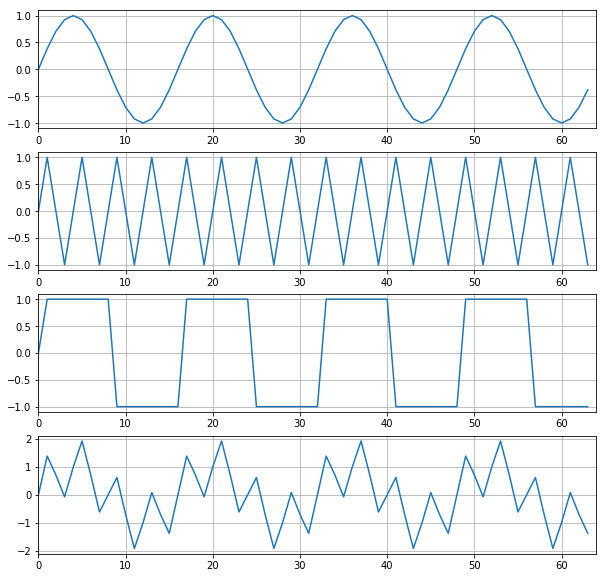

In [5]:
# Plot dos sinais

plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
plt.plot(n, s1)
plt.xlim(0, 64)
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(n, s2)
plt.xlim(0, 64)
plt.grid()

plt.subplot(4, 1, 3)
plt.plot(n, s3)
plt.xlim(0, 64)
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(n, x)
plt.xlim(0, 64)
plt.grid()

plt.show()

3. Obtenha o sinal $x(n) = s_1(n) + s_2(n)$. Filtre $s_1(n)$, $s_2(n)$, $x(n)$ e $s_3(n)$ com um sistema cuja função de transferência é dada por:  
$$H(z) = \dfrac{0.06746(1-2z^-1+z^-2)}{1-1.143z^-1+0.413z^-2}$$
Mostre os sinais originais e os sinais filtrados em gráficos que possibilitem compará-los.

In [6]:
# Construção da função de transferência
num = [0.06746, 2*0.06746, 0.06746]
den = [1, -1.143, 0.413]

# Aplicação do filtro. Obs: axis = 0 garante que a função lfilter terá mesmo comportamento que no matlab.

s1_filtrado = signal.lfilter(num, den, s1, axis = 0)
s2_filtrado = signal.lfilter(num, den, s2, axis = 0)
s3_filtrado = signal.lfilter(num, den, s3, axis = 0)
x_filtrado = signal.lfilter(num, den, x, axis = 0)

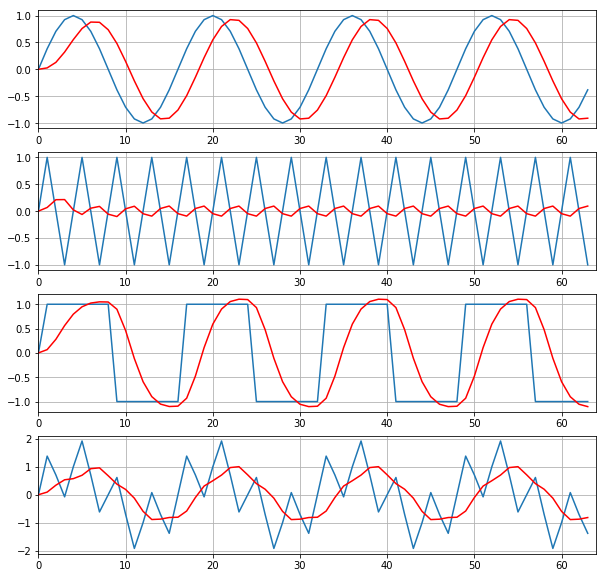

In [7]:
# Plots dos gráficos para visualização da transformação

plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
plt.plot(n, s1)
plt.plot(n, s1_filtrado, color = 'red')
plt.xlim(0, 64)
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(n, s2)
plt.plot(n, s2_filtrado, color = 'red')
plt.xlim(0, 64)
plt.grid()

plt.subplot(4, 1, 3)
plt.plot(n, s3)
plt.plot(n, s3_filtrado, color = 'red')
plt.xlim(0, 64)
plt.grid()

plt.subplot(4, 1, 4)
plt.plot(n, x)
plt.plot(n, x_filtrado, color = 'red')
plt.xlim(0, 64)
plt.grid()

plt.show()

4. O que o sistema faz com os diferentes sinais considerados? Explique o mais detalhadamente possível (se necessário, utilize outros gráficos para isso).

O primeiro sinal possui frequência mais baixa e sofreu apenas um atraso de fase, mas o sinal em si não sofreu distorção. O segundo sinal possui frequência mais elevada e sofreu atenuação de sua amplitude. O terceiro sinal, embora tenha frequencia mais baixa, sofreu uma certa distorção na sua forma. O quarto sinal também foi distorcido, onde apenas uma componente de baixa frequência apareceu.

De acordo com o observado em cada um dos gráficos, vemos que o sistema $H(z)$ trata-se de um filtro passa baixas, pois nos sinais $s_2, s_3$ e $x$ o filtro removeu os termos de alta frequência, evidenciando apenas os termos de baixa frequência no gráfico, inclusive no sinal $s_3$, embora tenha "baixa frequência", por sua construção ser uma composição de n sinais para formar uma onda quadrada, os termos de frequência mais elevada foram filtrados o que resultou na evidenciação das componentes de frequência mais baixa, as quais inclusive tem uma amplitude maior do que o sinal resultante.

## Parte 2 - Sinais Aleatórios - Estimação da Média e Variância

1. Gere $k = 100$ amostras de um sinal aleatório $s(n)$, que correspondem a amostras i.i.d. de uma distribuição gaussiana, com média nula e variância unitária, e as armazene em um vetor.

2. A partir do vetor obtido, estime: 
    
    a) O valor médio de $s(n)$
    
    b) A variância de $x(n)$


3. Repita o procedimento pelo menos 10 vezes (correspondem a 10 realizações do mesmo processo estocástico), armazenando os valores estimados para a média e variância em cada uma das realizações e comente os resultados obtidos.

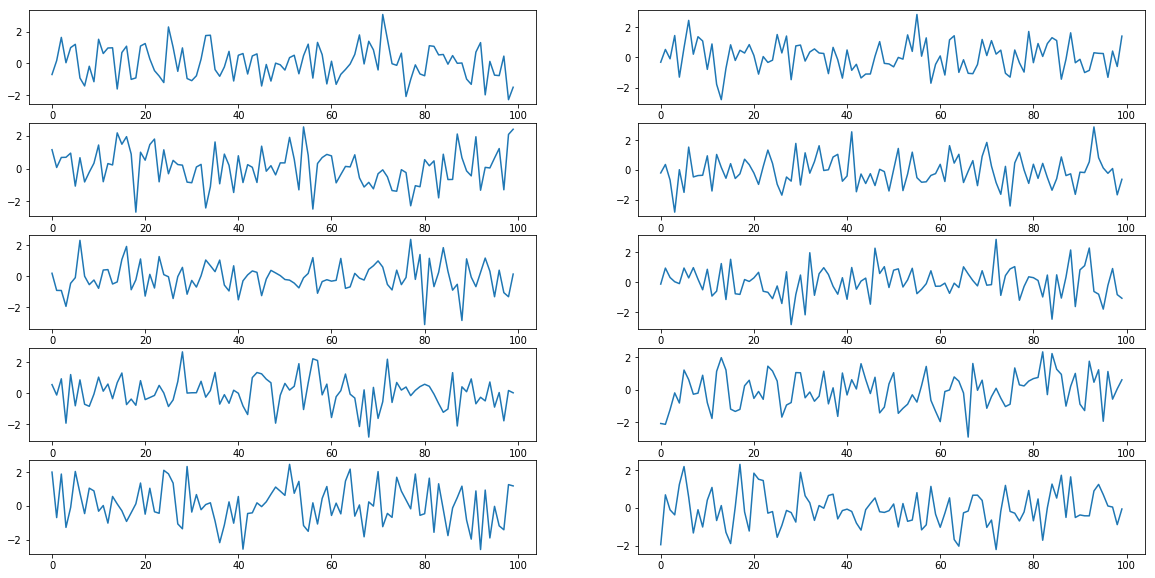


Valores das médias:
 [-0.08266762402594686, -0.08255769560815861, -0.061092615320829775, -0.04396923420583976, 0.010619818552270892, 0.04241413893642223, 0.04835311925227003, 0.050284949174460115, 0.08792491706957221, 0.08817135729287683]

Valores das variâncias:
 [0.8536800239072546, 0.8873177049931088, 0.9598116533197544, 0.9788365601328707, 0.9812543879588865, 0.9975288570112348, 1.0484602795071414, 1.1517470945417094, 1.2393989528946212, 1.3556432052227614]


In [12]:
k = 100 # Número de amostras
m = np.arange(0, k, 1) # Índice temporal
n_sinais = 10 # Número de sinais que serão criados

s4 = [0 for x in range(0, n_sinais)]
media = [0 for x in range(0, n_sinais)]
var = [0 for x in range(0, n_sinais)]

plt.figure(figsize = (20,10))

for index in range(0, n_sinais): 
  s4[index] = np.random.randn(k, )
  media[index] = np.mean(s4[index])
  var[index] = np.var(s4[index])
  
  plt.subplot(5, 2, index+1)
  plt.plot(m, s4[index])
  
plt.show()

media.sort()
var.sort()

print("\nValores das médias:\n", media)
print("\nValores das variâncias:\n", var)

Para $k = 100$, podemos verificar que a média do sinal ficou em torno de 0.0 variando de 0.08 pra mais ou pra menos, o que pode ser considerado um devio relativamente grande, mas dentro do esperado. Já a variância ficou em torno de 1.0, variando cerca de 0.20 pontos pra mais ou menos. Também é um desvio grande, mas dentro do esperado. 

4. Aumente agora o número de amostras $k$ do sinal e verifique o que ocorre com as estimativas. Apresente em um gráfico a estimativa da média em função do número de amostras k considerado (para cada valor de k existirão 10 médias estimadas). Comente os resultados.

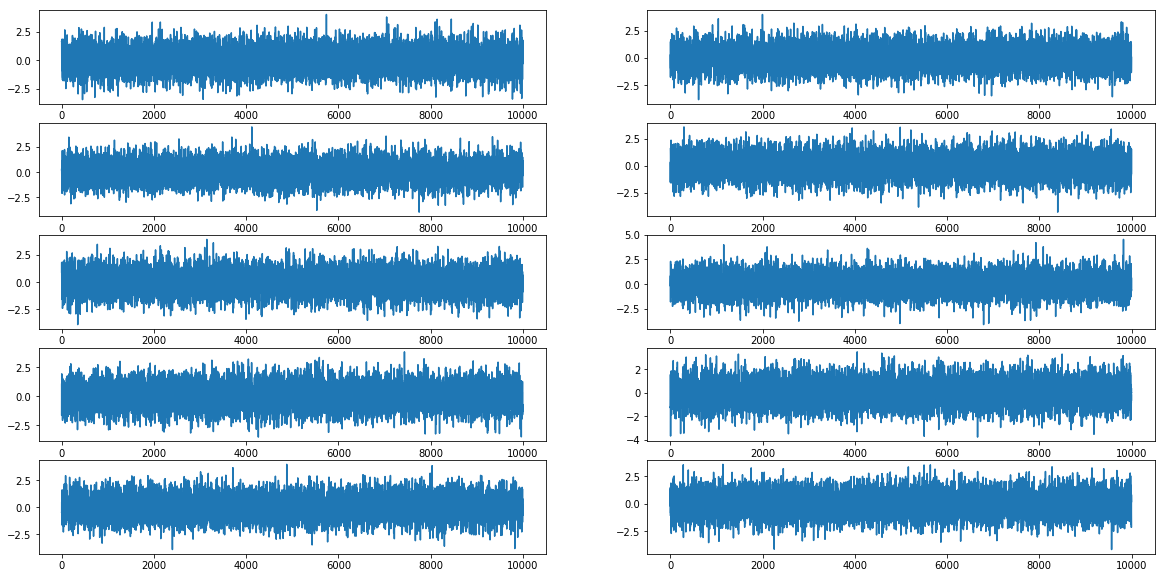


Valores das médias:
 [0.0007016706187470817, 0.0014482378106979183, 0.0017496734794361444, 0.0038879678679639537, 0.005334469376265453, 0.007309072213844132, 0.010626887034204412, 0.011150546643971398, 0.01488019039697423, 0.023160285309378786]

Valores das variâncias:
 [0.9729928678469457, 0.9880075030000156, 0.9942151021895137, 0.9948122770235029, 1.0032738057322388, 1.0032925268136426, 1.0058312172247392, 1.0134702368936448, 1.0178726824908886, 1.0195093575999392]


In [13]:
## Refazendo para um valor de k maior

k = 100*100 # 10 mil
n_sinais = 10 # Número de sinais que serão criados
m = np.arange(0, k, 1) # Índice Temporal

s4 = [0 for x in range(0, n_sinais)]
media = [0 for x in range(0, n_sinais)]
var = [0 for x in range(0, n_sinais)]

plt.figure(figsize = (20,10))

for index in range(0, n_sinais): 
  s4[index] = np.random.randn(k, )
  media[index] = np.mean(s4[index])
  var[index] = np.var(s4[index])
  
  plt.subplot(5, 2, index+1)
  plt.plot(m, s4[index])
  
plt.show()

media.sort()
var.sort()

print("\nValores das médias:\n", media)
print("\nValores das variâncias:\n", var)

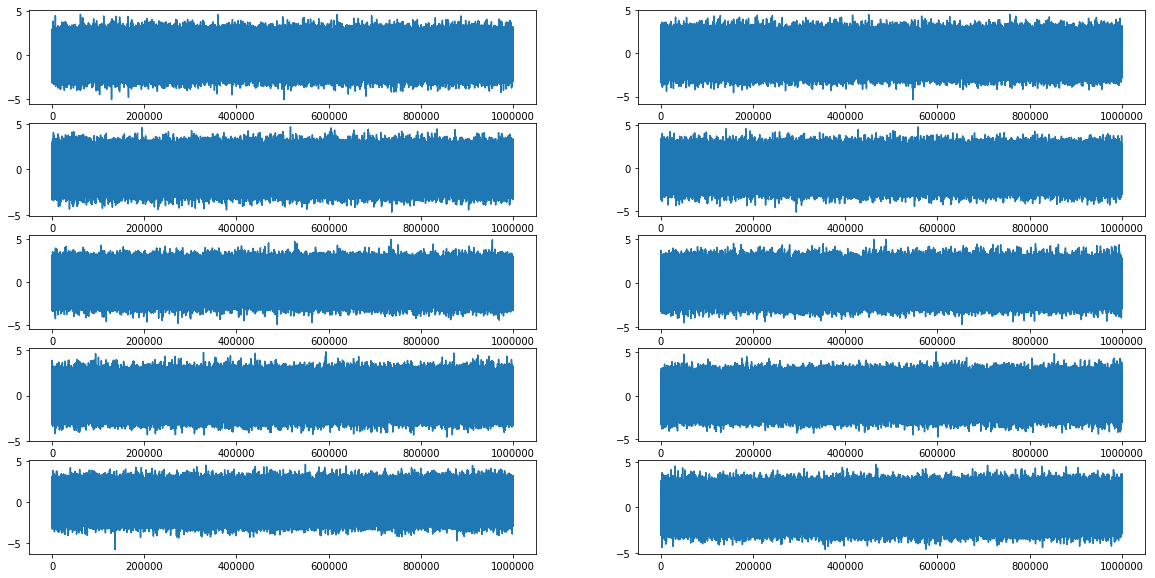


Valores das médias:
 [-0.0017432239695957905, -0.00046487443146035035, -0.00031973545434902555, -0.0002276878394091321, -0.00012218961895824835, 0.0001813417422220278, 0.0005346139365420294, 0.0007387532512677166, 0.0010852001624711948, 0.001246953244677579]

Valores das variâncias:
 [0.9968014244609246, 0.9984842014108326, 0.9988846568276365, 0.9989934294275724, 0.9995106708535344, 0.9996926702363625, 1.0005061377404882, 1.0008789403916534, 1.0018079584449273, 1.0021940163370597]


In [14]:
# Refazendo para um valor de k ainda maior

k = 100*100*100 # 1 milhão
n_sinais = 10 # Número de sinais que serão criados
m = np.arange(0, k, 1) # Indice temporal

s4 = [0 for x in range(0, n_sinais)]
media = [0 for x in range(0, n_sinais)]
var = [0 for x in range(0, n_sinais)]

plt.figure(figsize = (20,10))

for index in range(0, n_sinais): 
  s4[index] = np.random.randn(k, )
  media[index] = np.mean(s4[index])
  var[index] = np.var(s4[index])
  
  plt.subplot(5, 2, index+1)
  plt.plot(m, s4[index])
  
plt.show()

media.sort()
var.sort()

print("\nValores das médias:\n", media)
print("\nValores das variâncias:\n", var)

A principio, podemos observar que conforme k aumenta, a média se aproxima de 0 e a variância se aproxima de 1, ambos com desvios consideravelmente menores. Pode-se dizer que esse comportamento está dentro do esperado, visto que a premissa da distribuição normal é justamente média 0 e desvio unitário. Portanto, para valores maiores de k a tendencia é a aproximação desse comportamento. 

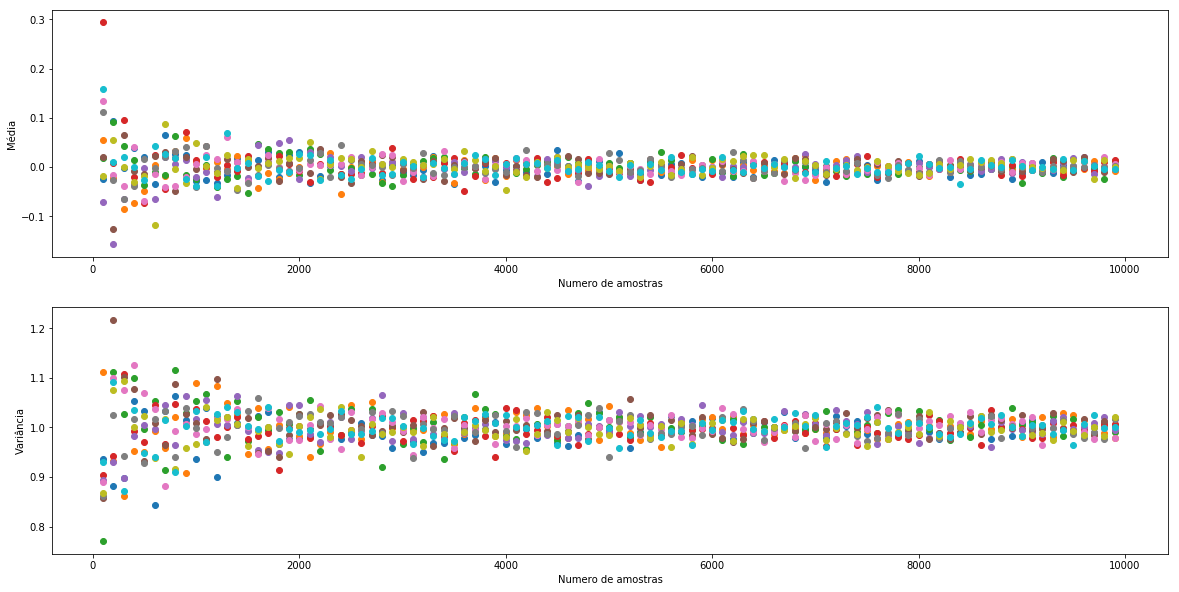

In [30]:
k = np.arange(100, 10000, 100)
n_sinais = 10 # Número de sinais que serão criados para cada k
m = np.arange(0, k.size, 1) # Índice Temporal

s4 = [[0 for x in range(0, k.size)] for x in range(0, n_sinais)]
media = [[0 for x in range(0, k.size)] for x in range(0, n_sinais)]
var = [[0 for x in range(0, k.size)] for x in range(0, n_sinais)]

plt.figure(figsize = (20,10))

for j in range (0, k.size): 
    for index in range(0, n_sinais): 
        s4[index][j] = np.random.randn(k[j], )
        media[index][j] = np.mean(s4[index][j])
        var[index][j] = np.var(s4[index][j])
  
        plt.subplot(2, 1, 1)
        plt.scatter(k[j], media[index][j])
        plt.subplot(2, 1, 2)
        plt.scatter(k[j], var[index][j])

plt.subplot(2, 1, 1)
plt.xlabel("Numero de amostras")
plt.ylabel("Média")

plt.subplot(2, 1, 2)
plt.xlabel("Numero de amostras")
plt.ylabel("Variância")
plt.show()

#print("\nValores das médias:\n", media)
#print("\nValores das variâncias:\n", var)

Nestes dois últimos plots podemos ver como a média e a variância tendem aos seus valores esperados conforme o número de amostras aumenta. (Obs: para k maiores que 10000 a célula demora muito pra fazer o scatter plot)